In [1]:
from HeaderP import *
from scipy.interpolate import interp1d

def getcolor(vrange,cm='plasma'):
    cmap = plt.cm.get_cmap(cm)
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]

# Simulation Part

In [2]:
df = pd.read_csv('g2.79e12_fehscatter_simdata.csv')
df_afe =  pd.read_csv('g2.79e12_ohscatter_simdata.csv')
ismslope = pd.read_pickle('../NIHAORbirth/ISM_slope_g279e12.pkl')
m2pattern = pd.read_pickle('ISM_slope_g279e12.pkl')
merger = pd.read_pickle('./g2.79e12_merger_Lucy.dat')
df_HESTIA = pd.read_csv('HESTIA.csv')

mergertimes = 13.8-merger['time']
mergervir = merger['vir_ratio']

agebin=np.linspace(0,16,17)
mass_ave = np.zeros(len(agebin)-1)

for i in range(len(agebin)-1):
    m = (mergertimes>agebin[i])&(mergertimes<agebin[i+1])
    #mass_ave[i] = sum(mergervir[m])
    if sum(m) == 0:
        mass_ave[i] = 0
    else:
        mass_ave[i] = sum(mergervir[m])

        
df_nobar = pd.read_csv('g7.55e11_fehscatter_simdata.csv')
ismslope_nobar = pd.read_pickle('../NIHAORbirth/ISM_slope_g755e11.pkl')
m2pattern_nobar = pd.read_pickle('ISM_slope_g755e11.pkl')
merger_nobar = pd.read_pickle('./g7.55e11_merger_Lucy.dat')

mergertimes_nobar = 13.8-np.array(merger_nobar['time'],dtype=float)
mergervir_nobar = np.array(merger_nobar['vir_ratio'],dtype=float)


mass_ave_nobar = np.zeros(len(agebin)-1)

for i in range(len(agebin)-1):
    m = (mergertimes_nobar>agebin[i])&(mergertimes_nobar<agebin[i+1])
    #mass_ave[i] = sum(mergervir[m])
    if sum(m) == 0:
        mass_ave_nobar[i] = 0
    else:
        mass_ave_nobar[i] = sum(mergervir_nobar[m])/sum(m)
        

(-0.9707867220794304, 6.986508734530749e-07)
0.1091393084555795


'plt.figure(figsize=(20,9))\n\nplt.subplot(1,2,2)\nm = df_afe[\'age\']<=10.5\nprint(sum(m))\nx = df_afe[\'slopes_rbir\']\nplt.scatter(x[m], df_afe[\'fehscatter\'][m], \n           c=df_afe[\'age\'][m], s=300, edgecolor=\'k\', \n            cmap=plt.get_cmap(\'plasma\', sum(m)))\np = fitpoints((x)[m], df_afe[\'fehscatter\'][m])\ndf_afe[\'sloperb_inf\'] = p(df_afe[\'fehscatter\'])\n\nplt.xlabel(\'$d$[O/H]/$dR_b$ [dex/kpc]\')\nplt.ylabel(\'[O/H] range [dex]\')\nplt.plot([-0.12,-0.02], p([-0.12,-0.02]), \'r-\', \n         label="%.2f($d$[O/H]/$dR_b$)+%.2f"%(p[1],p[0]))\n\np = fitpoints(df_afe[\'fehscatter\'][m], (x)[m])\ndf[\'sloperb_inf\'] = p(df_afe[\'fehscatter\'])\n\n\ncb = plt.colorbar()\nplt.legend(loc=4)\n#plt.xlim([0,0.15])\n#plt.ylim([0.08,0.2])\n\nimport scipy\nprint(scipy.stats.pearsonr(x[m], df_afe[\'fehscatter\'][m]))\n\nplt.subplot(1,2,1)\nm = df_afe[\'age\']<=10.5\nplt.plot(df_afe[\'age\'][m], df_afe[\'fehscatter\'][m], \'b-o\',zorder=5, markersize=10)\n\n#plt.ylim([0.095,0.

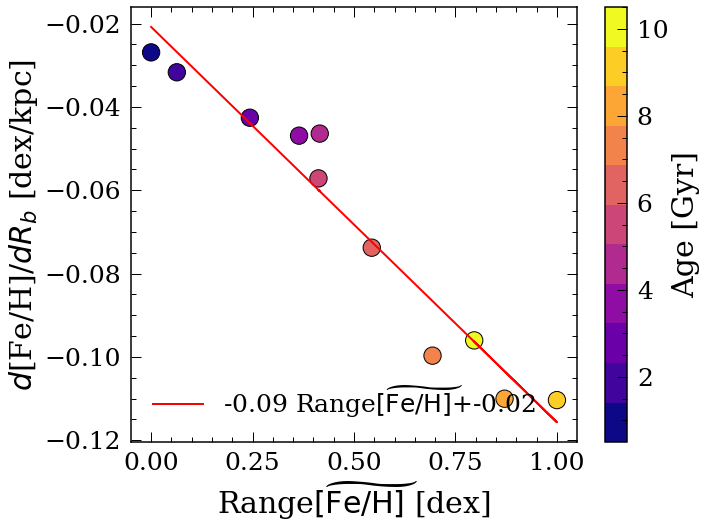

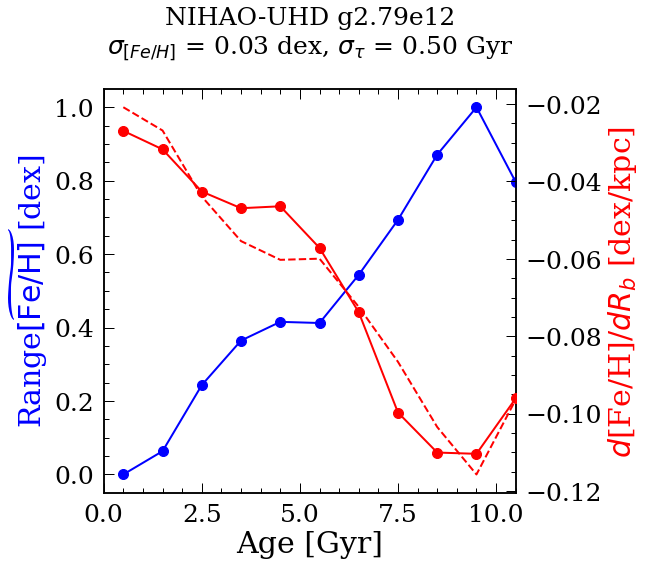

In [36]:
plt.figure(figsize=(10,8))
df = df.loc[df['age']<=10.5]

x = df['slopes_rbir']
df = df.dropna(subset=['fehscatter'])
df['fehscatter'] = (df['fehscatter']-min(df['fehscatter']))/(max(df['fehscatter'])-min(df['fehscatter']))

plt.scatter(df['fehscatter'], x,
           c=df['age'], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', len(df)))

p = fitpoints(df['fehscatter'], x)


plt.ylabel('$d$[Fe/H]/$dR_b$ [dex/kpc]')
plt.xlabel('Range$\widetilde{\mathrm{[Fe/H]}}$ [dex]')
plt.plot(df['fehscatter'], p(df['fehscatter']), 'r-', 
         label="%.2f Range$\widetilde{\mathrm{[Fe/H]}}$+%.2f"%(p[1],p[0]))

df['sloperb_inf'] = p(df['fehscatter'])


cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend()

import scipy
print(scipy.stats.pearsonr(x, df['fehscatter']))

plt.savefig('Figures/eps/scatters_sim_2',bbox_inches='tight')
plt.savefig('Figures/scatters_sim_2.png',bbox_inches='tight')

plt.figure(figsize=(9,8))
m = df['age']<=10.5
plt.plot(df['age'], df['fehscatter'], 'b-o',zorder=5, markersize=10)
#plt.ylim([0,1.5])
plt.ylabel('Range$\widetilde{\mathrm{[Fe/H]}}$ [dex]', color='b',zorder=5)
plt.xlabel('Age [Gyr]')
plt.twinx()

#plt.plot(df['age'], df['slopes'], 'r-o',zorder=5, markersize=10)
m = df['age']<=10.5
plt.plot(df['age'], df['slopes_rbir'], 'r-o',zorder=5, markersize=10)
plt.plot(df['age'], df['sloperb_inf'], 'r--',zorder=5)
plt.ylabel('$d$[Fe/H]/$dR_b$ [dex/kpc]', color='r',zorder=5)

#plt.vlines([10.5,4.5], ymin=-1, ymax=2, color='orange', alpha=0.5, zorder=2,
#          linewidth=38)

#plt.vlines(mergertimes[m], ymin=-1, ymax=2, color='orange', alpha=1, zorder=2)
"""plt.vlines(10.5, ymin=-1, ymax=2, color='k', 
           linestyles='--', zorder=2, linewidth=3)"""
#plt.plot([0,14],[0,0], 'k--',zorder=5)
#plt.ylim([-0.13, 0.02])
plt.title('NIHAO-UHD g2.79e12\n$σ_{[Fe/H]}$ = 0.03 dex, $σ_{τ}$ = 0.50 Gyr\n', fontsize=25)
plt.tight_layout()
plt.xlabel('Age [Gyr]')
plt.xlim([0,10.5])
m = (df['age']<=10.5)
print(np.mean(abs((df['slopes_rbir']-df['sloperb_inf'])/df['slopes_rbir'])[m]))

plt.savefig('Figures/eps/scatters_sim_1',bbox_inches='tight')
plt.savefig('Figures/scatters_sim_1.png',bbox_inches='tight')




"""plt.figure(figsize=(20,9))

plt.subplot(1,2,2)
m = df_afe['age']<=10.5
print(sum(m))
x = df_afe['slopes_rbir']
plt.scatter(x[m], df_afe['fehscatter'][m], 
           c=df_afe['age'][m], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', sum(m)))
p = fitpoints((x)[m], df_afe['fehscatter'][m])
df_afe['sloperb_inf'] = p(df_afe['fehscatter'])

plt.xlabel('$d$[O/H]/$dR_b$ [dex/kpc]')
plt.ylabel('[O/H] range [dex]')
plt.plot([-0.12,-0.02], p([-0.12,-0.02]), 'r-', 
         label="%.2f($d$[O/H]/$dR_b$)+%.2f"%(p[1],p[0]))

p = fitpoints(df_afe['fehscatter'][m], (x)[m])
df['sloperb_inf'] = p(df_afe['fehscatter'])


cb = plt.colorbar()
plt.legend(loc=4)
#plt.xlim([0,0.15])
#plt.ylim([0.08,0.2])

import scipy
print(scipy.stats.pearsonr(x[m], df_afe['fehscatter'][m]))

plt.subplot(1,2,1)
m = df_afe['age']<=10.5
plt.plot(df_afe['age'][m], df_afe['fehscatter'][m], 'b-o',zorder=5, markersize=10)

#plt.ylim([0.095,0.12])
plt.ylabel('[O/H] range [dex]', color='b',zorder=5)
plt.title('NIHAO-UHD g2.79e12\n$σ_{[O/H]}$ = 0.03 dex, $σ_{τ}$ = 0.50 Gyr\n', fontsize=25)
plt.xlim([0,10.5])
#plt.ylim([0.2,1.3])
plt.xlabel('Age [Gyr]')
m = (df_afe['age']<=10.5)
print(np.mean(abs((df_afe['slopes_rbir']-df_afe['sloperb_inf'])/df_afe['slopes_rbir'])[m]))


plt.twinx()
#plt.plot(df['age'], df['slopes'], 'r-o',zorder=5, markersize=10)
plt.plot(df_afe['age'][m], df_afe['slopes_rbir'][m], 'r-o',zorder=5, markersize=10)
#plt.plot(df_afe['age'][m], df_afe['sloperb_inf'][m], 'r--',zorder=5)
plt.xlabel('Age [Gyr]')
plt.ylabel('$d$[O/H]/$dR_b$ [dex/kpc]', color='r',zorder=5)
#plt.vlines([10.5,4.5], ymin=-1, ymax=2, color='orange', alpha=0.5, zorder=2,
#          linewidth=38)
#m = mergervir>0.1
#plt.vlines(mergertimes, ymin=-1, ymax=2, color='grey', alpha=0.2, zorder=1)
#plt.vlines(mergertimes[m], ymin=-1, ymax=2, color='orange', alpha=1, zorder=2)
#plt.vlines(10.5, ymin=-1, ymax=2, color='k', 
#           linestyles='--', zorder=2, linewidth=3)
#plt.plot([0,10.5],[0,0], 'k--',zorder=5)
#plt.ylim([-0.12, 0.02])
plt.xlim([0,10.5])
plt.xlabel('Age [Gyr]')

plt.tight_layout()
plt.savefig('Figures/eps/scatters_ofe_sim',bbox_inches='tight')
plt.savefig('Figures/scatters_ofe_sim.png',bbox_inches='tight')"""





In [37]:
#plt.plot(mergertimes, mergervir, 'k.')

(-0.9772762490816177, 9.307224513073367e-09)
0.07041307874192676


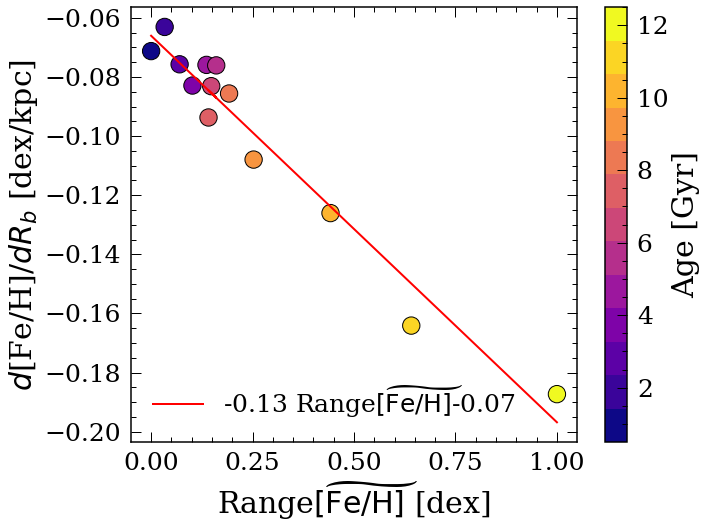

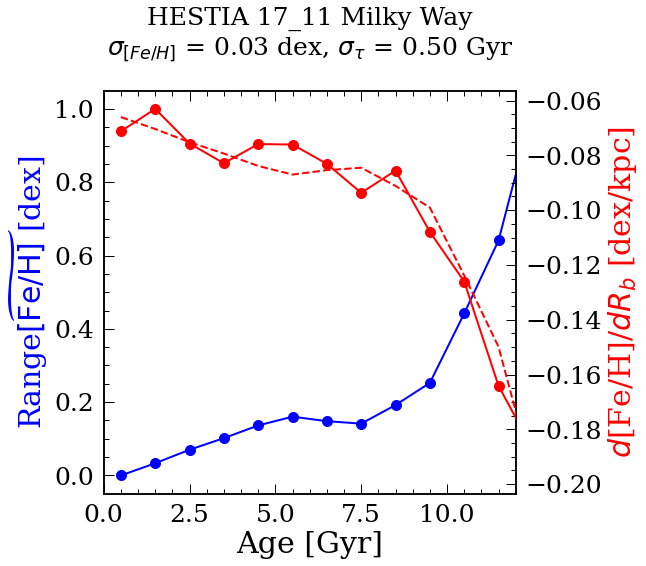

In [38]:
plt.figure(figsize=(10,8))
df_HESTIA = df_HESTIA.loc[df_HESTIA['age']<=13].reset_index(drop=True)
x = df_HESTIA['slopes_rbir']
df_HESTIA['fehscatter'] = (df_HESTIA['fehscatter']-min(df_HESTIA['fehscatter']))/(max(df_HESTIA['fehscatter'])-min(df_HESTIA['fehscatter']))

plt.scatter(df_HESTIA['fehscatter'], x, 
           c=df_HESTIA['age'], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', len(df_HESTIA)))
p = fitpoints(df_HESTIA['fehscatter'], x)


plt.ylabel('$d$[Fe/H]/$dR_b$ [dex/kpc]')
plt.xlabel('Range$\widetilde{\mathrm{[Fe/H]}}$ [dex]')
plt.plot(df_HESTIA['fehscatter'], p(df_HESTIA['fehscatter']), 'r-', 
         label="%.2f Range$\widetilde{\mathrm{[Fe/H]}}$-%.2f"%(p[1],abs(p[0])))


df_HESTIA['sloperb_inf'] = p(df_HESTIA['fehscatter'])


cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend()

import scipy
print(scipy.stats.pearsonr(x, df_HESTIA['fehscatter']))

plt.savefig('Figures/eps/scatters_sim_HESTIA_2',bbox_inches='tight')
plt.savefig('Figures/scatters_sim_HESTIA_2.png',bbox_inches='tight')

plt.figure(figsize=(9,8))
plt.plot(df_HESTIA['age'], df_HESTIA['fehscatter'], 'b-o',zorder=5, markersize=10)

plt.ylabel('Range$\widetilde{\mathrm{[Fe/H]}}$ [dex]', color='b',zorder=5)
plt.title('HESTIA 17_11 Milky Way\n$σ_{[Fe/H]}$ = 0.03 dex, $σ_{τ}$ = 0.50 Gyr\n', fontsize=25)
plt.xlabel('Age [Gyr]')

plt.twinx()
#plt.plot(df['age'], df['slopes'], 'r-o',zorder=5, markersize=10)
plt.plot(df_HESTIA['age'], df_HESTIA['slopes_rbir'], 'r-o',zorder=5, markersize=10)
plt.plot(df_HESTIA['age'], df_HESTIA['sloperb_inf'], 'r--',zorder=5)
plt.xlabel('Age [Gyr]')
plt.ylabel('$d$[Fe/H]/$dR_b$ [dex/kpc]', color='r',zorder=5)
"""m = mergervir>0.1
plt.vlines(mergertimes, ymin=-1, ymax=2, color='grey', alpha=0.2, zorder=1)
plt.vlines(mergertimes[m], ymin=-1, ymax=2, color='orange', alpha=1, zorder=2)
plt.vlines(10.5, ymin=-1, ymax=2, color='k', 
           linestyles='--', zorder=2, linewidth=3)"""
plt.xlabel('Age [Gyr]')
#plt.plot([0,14],[0,0], 'k--',zorder=5)
#plt.ylim([-0.2, 0.02])

plt.tight_layout()

#plt.vlines(12, ymin=-1, ymax=2, color='k', 
#           linestyles='--', zorder=2, linewidth=3)

m = (df_HESTIA['age']<=13)
print(np.mean(abs((df_HESTIA['slopes_rbir']-df_HESTIA['sloperb_inf'])/df_HESTIA['slopes_rbir'])[m]))
plt.xlim([0,12])

#plt.ylim([0.25,2])
plt.savefig('Figures/eps/scatters_sim_HESTIA_1',bbox_inches='tight')
plt.savefig('Figures/scatters_sim_HESTIA_1.png',bbox_inches='tight')

# Data Part

In [39]:
from astropy.table import Table
sub = Table.read('subgiant_fullparam_update.fits', format='fits')
sub = sub.to_pandas()
sub_rbir = pd.read_csv('RbirLAMOST.csv')
sub_rbir.columns

sub_rbir = sub_rbir.rename(columns={'          rb': 'Rb', 
                                    '          rb_err': 'Rb_err',
                                   '       specid':'specid'})
sub['SPECID'] = [str(i.decode(encoding="utf-8").split()[0]) for i in sub['SPECID']]
sub_rbir['specid'] = [str(i.split()[0]) for i in sub_rbir['specid']]

sub_rbir = pd.merge(sub, 
               sub_rbir[['specid', 'Rb', 'Rb_err']], 
               left_on='SPECID', right_on='specid', how='inner')
print(len(sub_rbir), len(sub))

200674 247104


## selection

In [40]:
#fehscatter

In [41]:
"""df = pd.read_csv('data_slopps.csv')
ages, fehscatter, slopes_rbir = df['age'], df['fehscatter'], df['slopes_rbir']


plt.figure(figsize=(8,8))
x = slopes_rbir

m2 = (ages<4)&(x==x)
m2 = m2&(fehscatter==fehscatter)


p_plot = fitpoints(x[m2], fehscatter[m2])
p = fitpoints(fehscatter[m2], x[m2])



plt.figure(figsize=(20,8))
plt.subplot(1,2,1)

m3 = df['age']<13
plt.errorbar(df['age'][m3], df['fehscatter'][m3], yerr=df['fehscatter_err'][m3],
             fmt='b-o',zorder=5, markersize=10)
m = mergervir>0.1
#plt.ylim([0.4,1.2])
plt.ylabel('[Fe/H] range [dex]', color='b',zorder=5)
plt.xlabel('Age [Gyr]')
plt.twinx()
#plt.plot(df['age'], df['slopes'], 'r-o',zorder=5, markersize=10)
m2 = df['age']<4
m3 = df['age']<13
plt.plot(df['age'][m2], df['slopes_rbir'][m2], 'r-o',zorder=5, markersize=10)
plt.plot(df['age'][m3], df['slopes_rbir'][m3], 'r--',zorder=5, markersize=10)

plt.plot(df['age'][m3], df['slope_rbir_infer'][m3], 'r-o',zorder=5, markersize=10)
#plt.vlines(13, -0.25, 0.05, color='k', 
#           linestyles='--', zorder=2, linewidth=3)

plt.xlabel('Age [Gyr]')
plt.ylabel('$d$[Fe/H]/$dR_b$ [dex/kpc]', color='r',zorder=5)
m = mergervir>0.1
#plt.plot([0,13],[0,0], 'k--',zorder=5)
#plt.ylim([-0.2, 0.02])


plt.subplot(1,2,2)
m2 = ages<13
plt.scatter(x[m2], fehscatter[m2], 
           c=ages[m2], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', len(df)),zorder=10)
plt.errorbar(x[m2], fehscatter[m2], yerr=df['fehscatter_err'][m2],
             fmt='ko',zorder=1, markersize=1)
print(df['fehscatter_err'][m2]/12)
m2 = (ages<4)&(x==x)
plt.plot(p(fehscatter)[m2],
         (fehscatter)[m2], 'r-', 
         label="%.2f $d$[Fe/H]/$dR$-%.2f"%(p_plot[1],abs(p_plot[0])))
plt.plot(p([0.5,1]),
         ([0.5,1]), 'r--')

def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.01, 
              length_includes_head = True,
              color=colors)

drawArrow([x[12],fehscatter[12]],
          [p(fehscatter[12]),fehscatter[12]],'k')
drawArrow([x[9],fehscatter[9]],
          [p(fehscatter[9]),fehscatter[9]],'k')
drawArrow([x[7],fehscatter[7]],
          [p(fehscatter[7]),fehscatter[7]],'k')
         
plt.xlabel('$d$[Fe/H]/$dR_b$ [dex/kpc]')
plt.ylabel('[Fe/H] range [dex]')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend(loc=3)
plt.tight_layout()
plt.savefig('Figures/eps/scatters_toslope_data',bbox_inches='tight')
plt.savefig('Figures/scatters_toslope_data.png',bbox_inches='tight')


slope_rbir_infer = np.zeros(len(fehscatter))
slope_rbir_infer[~m2] =p((fehscatter[~m2]))
slope_rbir_infer[m2] = slopes_rbir[m2]
df['slope_rbir_infer'] = slope_rbir_infer"""

'df = pd.read_csv(\'data_slopps.csv\')\nages, fehscatter, slopes_rbir = df[\'age\'], df[\'fehscatter\'], df[\'slopes_rbir\']\n\n\nplt.figure(figsize=(8,8))\nx = slopes_rbir\n\nm2 = (ages<4)&(x==x)\nm2 = m2&(fehscatter==fehscatter)\n\n\np_plot = fitpoints(x[m2], fehscatter[m2])\np = fitpoints(fehscatter[m2], x[m2])\n\n\n\nplt.figure(figsize=(20,8))\nplt.subplot(1,2,1)\n\nm3 = df[\'age\']<13\nplt.errorbar(df[\'age\'][m3], df[\'fehscatter\'][m3], yerr=df[\'fehscatter_err\'][m3],\n             fmt=\'b-o\',zorder=5, markersize=10)\nm = mergervir>0.1\n#plt.ylim([0.4,1.2])\nplt.ylabel(\'[Fe/H] range [dex]\', color=\'b\',zorder=5)\nplt.xlabel(\'Age [Gyr]\')\nplt.twinx()\n#plt.plot(df[\'age\'], df[\'slopes\'], \'r-o\',zorder=5, markersize=10)\nm2 = df[\'age\']<4\nm3 = df[\'age\']<13\nplt.plot(df[\'age\'][m2], df[\'slopes_rbir\'][m2], \'r-o\',zorder=5, markersize=10)\nplt.plot(df[\'age\'][m3], df[\'slopes_rbir\'][m3], \'r--\',zorder=5, markersize=10)\n\nplt.plot(df[\'age\'][m3], df[\'slope_rbir_

In [42]:
"""df_afe = pd.read_csv('data_slopps_afe.csv')

ages_afe, slopesafe_rbir,fehscatter_afe,fehscatter_afe_err = df_afe['age'].values, df_afe['slopes_rbir'].values, df_afe['fehscatter'].values,df_afe['fehscatter_err'].values

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
m2 = (ages_afe>0.5)&(ages_afe<13)
plt.errorbar(ages_afe[m2], fehscatter_afe[m2], 
             yerr=fehscatter_afe_err[m2], fmt='b-o',markersize=10)
plt.ylabel('[α/H] range [dex]', color='b',zorder=5)
#plt.ylim([0.3,1])
plt.xlabel('Age [Gyr]')

plt.twinx()
m2 = (ages_afe>0.5)&(ages_afe<13)
slopesafe_rbir, fehscatter_afe, fehscatter_afe_err = np.array(slopesafe_rbir,dtype=float), np.array(fehscatter_afe,dtype=float), np.array(fehscatter_afe_err,dtype=float)



m2 = (ages_afe>0.5)&(ages_afe<13)
plt.plot(ages_afe[m2], slopesafe_rbir[m2], 'r-o',zorder=5,markersize=10)
plt.xlabel('Age [Gyr]')
plt.ylabel('$d$[α/H]/$dR_b$ [dex/kpc]', color='r',zorder=5)
#plt.plot([0,14],[0,0], 'k--',zorder=5)
#plt.ylim([-0.15, 0.05])
plt.title('LAMOST Data', fontsize=25)


plt.subplot(1,2,2)
plt.scatter(slopesafe_rbir[m2], fehscatter_afe[m2], 
           c=ages_afe[m2], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', len(df)),zorder=10)
plt.errorbar(slopesafe_rbir[m2], fehscatter_afe[m2], 
             yerr=fehscatter_afe_err[m2], fmt='ko',zorder=-1)

p_plot = fitpoints(slopesafe_rbir[m2], fehscatter_afe[m2])
p = fitpoints(fehscatter_afe[m2], slopesafe_rbir[m2])
plt.xlabel('$d$[α/H]/$dR_b$ [dex/kpc]')
plt.ylabel('[α/H] range [dex]')
plt.plot(p(fehscatter_afe)[m2],
         (fehscatter_afe)[m2], 'r-', 
         label="%.2f $d$[α/H]/$dR_b$+%.2f"%(p_plot[1],p_plot[0]))

cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend()

plt.tight_layout()




plt.savefig('Figures/eps/scatters_toslope_data_afe',bbox_inches='tight')
plt.savefig('Figures/scatters_toslope_data_afe.png',bbox_inches='tight')

"""

'df_afe = pd.read_csv(\'data_slopps_afe.csv\')\n\nages_afe, slopesafe_rbir,fehscatter_afe,fehscatter_afe_err = df_afe[\'age\'].values, df_afe[\'slopes_rbir\'].values, df_afe[\'fehscatter\'].values,df_afe[\'fehscatter_err\'].values\n\nplt.figure(figsize=(20,8))\nplt.subplot(1,2,1)\nm2 = (ages_afe>0.5)&(ages_afe<13)\nplt.errorbar(ages_afe[m2], fehscatter_afe[m2], \n             yerr=fehscatter_afe_err[m2], fmt=\'b-o\',markersize=10)\nplt.ylabel(\'[α/H] range [dex]\', color=\'b\',zorder=5)\n#plt.ylim([0.3,1])\nplt.xlabel(\'Age [Gyr]\')\n\nplt.twinx()\nm2 = (ages_afe>0.5)&(ages_afe<13)\nslopesafe_rbir, fehscatter_afe, fehscatter_afe_err = np.array(slopesafe_rbir,dtype=float), np.array(fehscatter_afe,dtype=float), np.array(fehscatter_afe_err,dtype=float)\n\n\n\nm2 = (ages_afe>0.5)&(ages_afe<13)\nplt.plot(ages_afe[m2], slopesafe_rbir[m2], \'r-o\',zorder=5,markersize=10)\nplt.xlabel(\'Age [Gyr]\')\nplt.ylabel(\'$d$[α/H]/$dR_b$ [dex/kpc]\', color=\'r\',zorder=5)\n#plt.plot([0,14],[0,0], \'k--\

217672 0.014746958726891838
scatnorm: 0.5181281881216389
[ 0.   1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5] [-0.07       -0.08412119 -0.09211523 -0.10496481 -0.12408199 -0.1346299
 -0.14301419 -0.15205617 -0.14956959 -0.14008704 -0.13164529 -0.13126139
 -0.13347238]


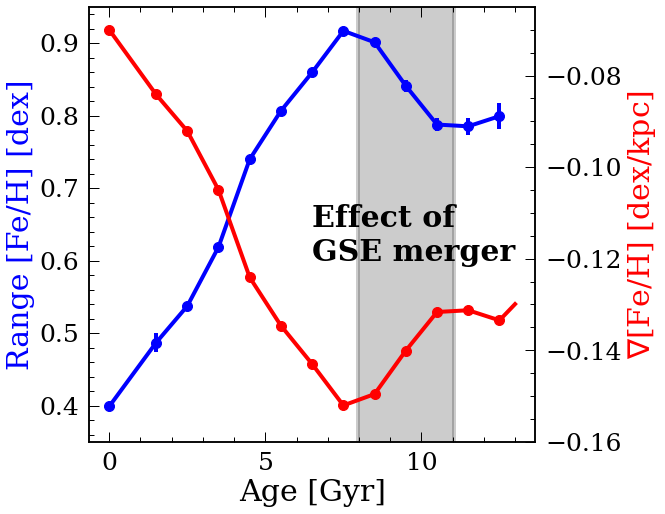

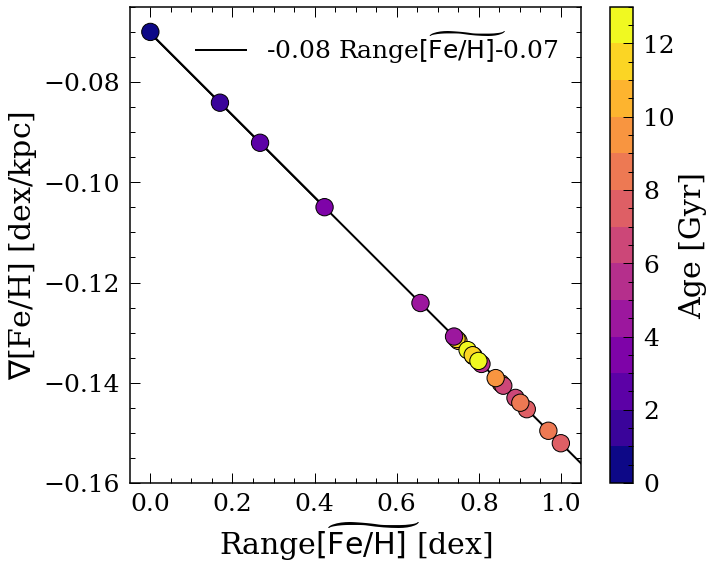

In [60]:
sub_tryRb = pd.read_pickle('NewRb.pkl')
#print(len(sub_tryRb))
sub_tryRb = sub_tryRb.loc[sub_tryRb['FEH']>-1]
#sub_tryRb = pd.read_pickle('NewRb_dip.pkl')

print(len(sub_tryRb), sum(sub_tryRb['Rb']<0)/len(sub_tryRb))

df = pd.read_csv('data_slopps.csv')
#print(df.columns)
ages, fehscatter, fehscatter_err  = df['age'], df['fehscatter'], df['fehscatter_err']

df = pd.read_csv('slopes_cor.csv')
mnana =(df['slope_cor'].values==df['slope_cor'].values)
newages = np.append([0],df['age'].values[mnana])
newslopes = np.append([-0.07],df['slope_cor'].values[mnana])



mfit = (df['slope_cor']==df['slope_cor'])
mfit = mfit&(df['age']<=13)
mfit_all = newages<13
slope_inf = interp1d(newages, newslopes,'linear')
ave_inf = interp1d(df['age'], df['feh_cor'],'linear')


plt.figure(figsize=(8,8))
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.5, head_length=0.02, 
              length_includes_head = True,
              color=colors, linewidth=10)
"""drawArrow([8,0.6],[8,0.5],'k')
"""
agescat = np.append([0], ages[(ages<13)&(fehscatter==fehscatter)])
scatnew_nonorm = np.append([0.3988491221805143], fehscatter[(ages<13)&(fehscatter==fehscatter)])
scatnew_nonorm_err = np.append([0], fehscatter_err[(ages<13)&(fehscatter==fehscatter)])

print('scatnorm:',max(scatnew_nonorm)-min(scatnew_nonorm))
scatnew = (scatnew_nonorm-min(scatnew_nonorm))/(max(scatnew_nonorm)-min(scatnew_nonorm))
scatnew_err = (scatnew_nonorm_err)/(max(scatnew_nonorm)-min(scatnew_nonorm))
"""plt.plot(agescat, 
         scatnew_nonorm,
         'b--o', markersize=15,
        linewidth=4)"""

plt.errorbar(agescat, scatnew_nonorm,
         yerr=scatnew_nonorm_err,
         fmt = 'b-o', markersize=10,
        linewidth=4)


plt.ylabel('Range [Fe/H] [dex]',color='b')
plt.vlines([8,11], ymin=-2, ymax=2, color='k', alpha=0.2,
          zorder=1)
plt.vlines([9.5], ymin=-2, ymax=2, color='k', alpha=0.2,
          zorder=1, linewidth=100)
plt.ylim([0.35, 0.95])
plt.annotate('Effect of\nGSE merger',(6.5,0.6), fontsize=30,
            weight='bold')
plt.xlabel('Age [Gyr]')
plt.twinx()
plt.plot(newages[mfit_all], newslopes[mfit_all], 'ro', markersize=10)
print(newages[mfit_all], newslopes[mfit_all])

plt.plot(np.linspace(0,13,100), slope_inf(np.linspace(0,13,100)), 'r-',
        linewidth=4)
plt.ylim([-0.16,-0.065])
plt.xlabel('Look-back Time [Gyr]')
plt.ylabel('$\\nabla$[Fe/H] [dex/kpc]',color='r')
plt.savefig('Figures/eps/finalfunc_1.pdf',bbox_inches='tight')
plt.savefig('Figures/finalfunc_1.png',bbox_inches='tight')


p = fitpoints(scatnew[1:], 
              newslopes[mfit_all][1:])
plt.figure(figsize=(10,8))
m2 = (ages<13)&(ages>=4)
m3 = (ages<4)&(x==x)
plt.scatter(scatnew, 
            newslopes[mfit_all], 
           c=agescat, s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', len(agescat)),zorder=10,
           vmin=0,vmax=13)
plt.scatter(fehscatter[m2], p(fehscatter[m2]),
           c=ages[m2], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', len(agescat)),zorder=10,
           vmin=0,vmax=13)

m2 = (agescat<4)
plt.plot((scatnew)[m2], p(scatnew)[m2], 'k-', 
         label="%.2f Range$\widetilde{\mathrm{[Fe/H]}}$-%.2f"%(p[1],abs(p[0])))
plt.plot(([0,1.1]), p([0,1.1]),'k-')
         
plt.ylabel('$\\nabla$[Fe/H] [dex/kpc]')
plt.xlabel('Range$\widetilde{\mathrm{[Fe/H]}}$ [dex]')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend(loc=1)
plt.xlim([-0.05,1.05])
plt.ylim([-0.16,-0.065])
plt.tight_layout()

plt.savefig('Figures/eps/finalfunc_2.pdf',bbox_inches='tight')
plt.savefig('Figures/finalfunc_2.png',bbox_inches='tight')

217672 0.014746958726891838
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5] [ 0.61768895  0.60427191  0.58963354  0.57352899  0.55563154  0.53549139
  0.51246486  0.48558399  0.39639054  0.28308573  0.01804799 -0.14653418
 -0.29736326 -0.33262962 -0.39743068 -0.42454639]


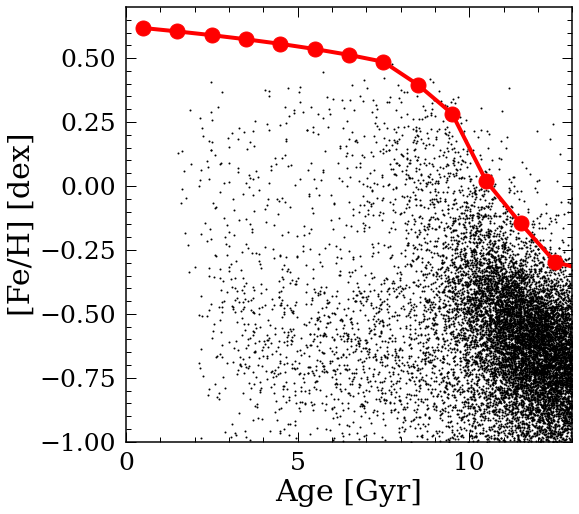

In [61]:
#sub_tryRb = pd.read_pickle('NewRb.pkl')
sub_tryRb = pd.read_pickle('NewRb.pkl')
#print(len(sub_tryRb))
sub_tryRb = sub_tryRb.loc[sub_tryRb['FEH']>-1]
#sub_tryRb = pd.read_pickle('NewRb_dip.pkl')

print(len(sub_tryRb), sum(sub_tryRb['Rb']<0)/len(sub_tryRb))

df = pd.read_csv('data_slopps.csv')
ages, fehscatter, slopes_rbir = df['age'], df['fehscatter'], df['slopes_rbir']

df = pd.read_csv('slopes_cor.csv')
mnana =(df['slope_cor'].values==df['slope_cor'].values)
newages = np.append([0],df['age'].values[mnana])
newslopes = np.append([-0.07],df['slope_cor'].values[mnana])

mfit = (df['slope_cor']==df['slope_cor'])
mfit = mfit&(df['age']<=13)
mfit_all = newages<13
slope_inf = interp1d(newages, newslopes,'linear')
ave_inf = interp1d(df['age'], df['feh_cor'],'linear')


plt.figure(figsize=(8,8))

sub_tryRb_inner = sub_tryRb.loc[sub_tryRb['R_GUIDING']<5]
"""plt.hexbin(sub_tryRb_inner['AGE'], sub_tryRb_inner['FEH'], 
           cmap=plt.get_cmap('binary',15), gridsize=50,
           extent=(0,16,-1,0.7))"""
plt.plot(sub_tryRb_inner['AGE'], sub_tryRb_inner['FEH'], 'ko',
        markersize=1)
plt.plot(df['age'], df['feh_cor'], 'r-o',label='Inferred [Fe/H](0,τ)',
        linewidth=4, markersize=15)
plt.xlim([0,13])
plt.ylim([-1,0.7])
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H] [dex]')

print(df['age'].values, df['feh_cor'].values)

plt.savefig('Figures/eps/finalfunc.pdf',bbox_inches='tight')
plt.savefig('Figures/finalfunc.png',bbox_inches='tight')

## With new Rb

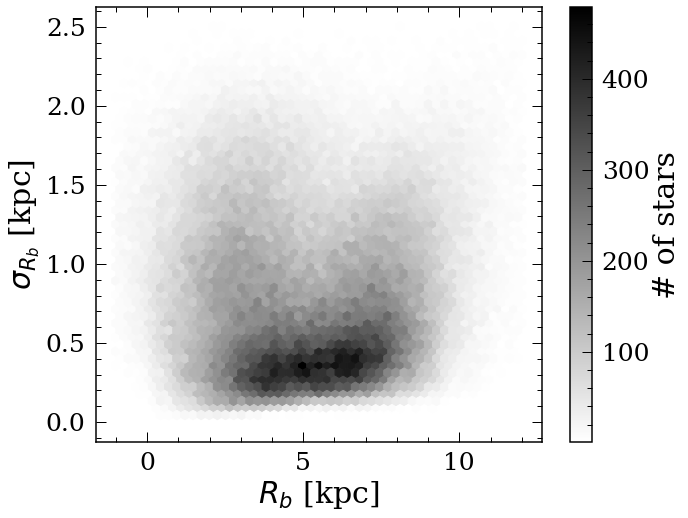

In [62]:
plt.figure(figsize=(10,8))
plt.hexbin(sub_tryRb['Rb'], sub_tryRb['Rb_err'], mincnt=1,
          cmap=plt.get_cmap('binary'),extent=(-1,12,0,2.5),
          gridsize=50)
plt.colorbar(label='# of stars')
plt.xlabel('$R_b$ [kpc]')
plt.ylabel('$σ_{R_b}$ [kpc]')

plt.savefig('./Figures/eps/Rbirerror')
plt.savefig('./Figures/Rbirerror.png')


217672


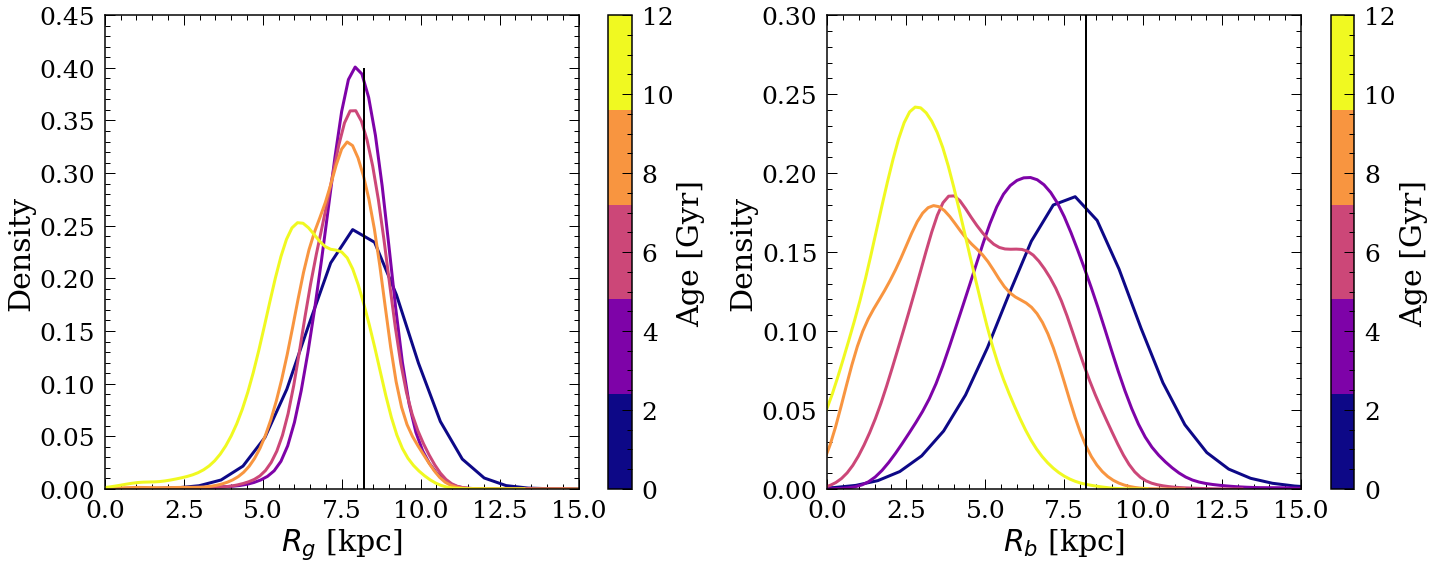

In [63]:
sub_tryRb = pd.read_pickle('NewRb.pkl')
sub_tryRb = sub_tryRb.loc[sub_tryRb['FEH']>-1]
sub_tryRb = sub_tryRb.loc[sub_tryRb['AGE']<13]
print(len(sub_tryRb))

agebin_Rb = np.linspace(0,12,6)
agebin_colors = getcolor(range(len(agebin_Rb)-1))

from sklearn.neighbors import KernelDensity


plt.figure(figsize=(20,8))

#plt.hist(sub_tryRb['Rb'], color='k', alpha=0.2, bins=np.linspace(0,20,100))
#m = abs(sub_tryRb['R']-8.2)<100
m = (sub_tryRb['R']>7.7)&(sub_tryRb['R']<8.7)
#m = m&(sub_tryRb['FEH']>-1)
data_rbdis = sub_tryRb[m]
plt.subplot(1,2,2)
for i in range(len(agebin_Rb)-1):
    sub_sing = data_rbdis.loc[(data_rbdis['AGE']>agebin_Rb[i])&(data_rbdis['AGE']<agebin_Rb[i+1])]
    #print(agebin_Rb[i], np.percentile(sub_sing['Rb'],95)-np.percentile(sub_sing['Rb'],5))
    fre, edg = np.histogram(sub_sing['Rb'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    fre_g, edg_g = np.histogram(sub_sing['R_GUIDING'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    
    fre = gaussian_filter(fre, 2)
    fre_g = gaussian_filter(fre_g, 2)
    
    m2 = (fre!=0)
    plt.plot((edg[1:]+edg[:-1])[m2]/2, fre[m2], color=agebin_colors[i], linewidth=3)
    
    #m2 = (fre_g!=0)
    #plt.plot((edg[1:]+edg[:-1])[m2]/2, fre_g[m2], '--', color=agebin_colors[i], linewidth=3)
    
    #kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(sub_sing['Rb'].values.reshape(-1, 1))
    #s = np.linspace(-20,15)
    #e = kde.score_samples(s.reshape(-1,1))
    #plt.plot(s, e, color=agebin_colors[i], linewidth=3)
    
    
plt.vlines(8.2, ymin=0, ymax=0.3, color='k')
plt.scatter(100,0,c=5,vmin=min(agebin_Rb),vmax=max(agebin_Rb),
           cmap=plt.get_cmap('plasma', len(agebin_Rb)-1))
#plt.plot([0,15],[0,0], 'k--')
plt.xlim([-0,15])
plt.ylim([-0,0.3])
#plt.yscale('log')
plt.xlabel('$R_b$ [kpc]')
plt.ylabel('Density')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')


plt.subplot(1,2,1)
for i in range(len(agebin_Rb)-1):
    sub_sing = data_rbdis.loc[(data_rbdis['AGE']>agebin_Rb[i])&(data_rbdis['AGE']<agebin_Rb[i+1])]
    #print(agebin_Rb[i], np.percentile(sub_sing['Rb'],95)-np.percentile(sub_sing['Rb'],5))
    #fre, edg = np.histogram(sub_sing['Rb'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    fre_g, edg_g = np.histogram(sub_sing['R_GUIDING'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    
    #fre = gaussian_filter(fre, 2)
    fre_g = gaussian_filter(fre_g, 2)
    
    #m2 = (fre!=0)
    #plt.plot((edg[1:]+edg[:-1])[m2]/2, fre[m2], color=agebin_colors[i], linewidth=3)
    
    m2 = (fre_g!=0)
    plt.plot((edg_g[1:]+edg_g[:-1])[m2]/2, fre_g[m2], color=agebin_colors[i], linewidth=3)
    
    #kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(sub_sing['Rb'].values.reshape(-1, 1))
    #s = np.linspace(-20,15)
    #e = kde.score_samples(s.reshape(-1,1))
    #plt.plot(s, e, color=agebin_colors[i], linewidth=3)
    
    
plt.vlines(8.2, ymin=0, ymax=0.4, color='k')
plt.scatter(100,0,c=5,vmin=min(agebin_Rb),vmax=max(agebin_Rb),
           cmap=plt.get_cmap('plasma', len(agebin_Rb)-1))
#plt.plot([0,15],[0,0], 'k--')
plt.xlim([-0,15])
plt.ylim([-0,0.45])
#plt.yscale('log')
plt.xlabel('$R_g$ [kpc]')
plt.ylabel('Density')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')

plt.tight_layout()


plt.savefig('Figures/eps/rbirdist',bbox_inches='tight')
plt.savefig('Figures/rbirdist.png',bbox_inches='tight')

In [47]:
import warnings
warnings.filterwarnings('ignore')

def movingMed_time(x,y,x_window,delta_x_window):
    # medians output
    x_med=np.zeros(len(x))
    y_med=np.zeros(len(y))

    # define the boundaries of the windows
    if len(x)==0:
        return x_med,y_med
    window_min=float(min(x))
    window_max=float(window_min+delta_x_window)
    
    # max time
    maxtime=max(x)
    
    # break when time window hits the end
    while window_max<=maxtime+x_window:
        seldf=(x>=window_min) & (x<=window_max) # get points between the window
        if sum(seldf)<100:
            x_med[seldf]=np.nan
            y_med[seldf]=np.nan
        else:
            x_med[seldf]=np.median(x[seldf]) # all values for these indices are subsituded with median time
            y_med[seldf]=np.median(y[seldf]) # all values for these indices are subsituded with median flux

        # slide the window
        window_min=window_min+delta_x_window
        window_max=window_max+delta_x_window
    return x_med, y_med

In [48]:
def coldensity(x,y,binsize=50,extend=[]):
    if len(extend)==0:
        extend=(min(x),max(x),min(y),max(y))
    H, yedges, xedges = np.histogram2d(x, y, 
                                bins=(np.linspace(extend[0],extend[1],binsize),
                                        np.linspace(extend[2],extend[3],binsize)))
    """for i in trange(len(yedges)-1):
        m = (x>yedges[i])&(x<yedges[i+1])
        H[i,:] = (H[i,:]/sum(m))/max(H[i,:]/sum(m))"""
    for i in trange(len(xedges)-1):
        m = (y>xedges[i])&(y<xedges[i+1])
        H[:,i] = (H[:,i]/sum(m))/max(H[:,i]/sum(m))

    for i in range(len(H[0,:])):
        for j in range(len(H[:,0])):
            if H[j,i] == 0:
                H[j,i] = np.nan

    return yedges, xedges, H.T


In [49]:
#plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=0.07)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


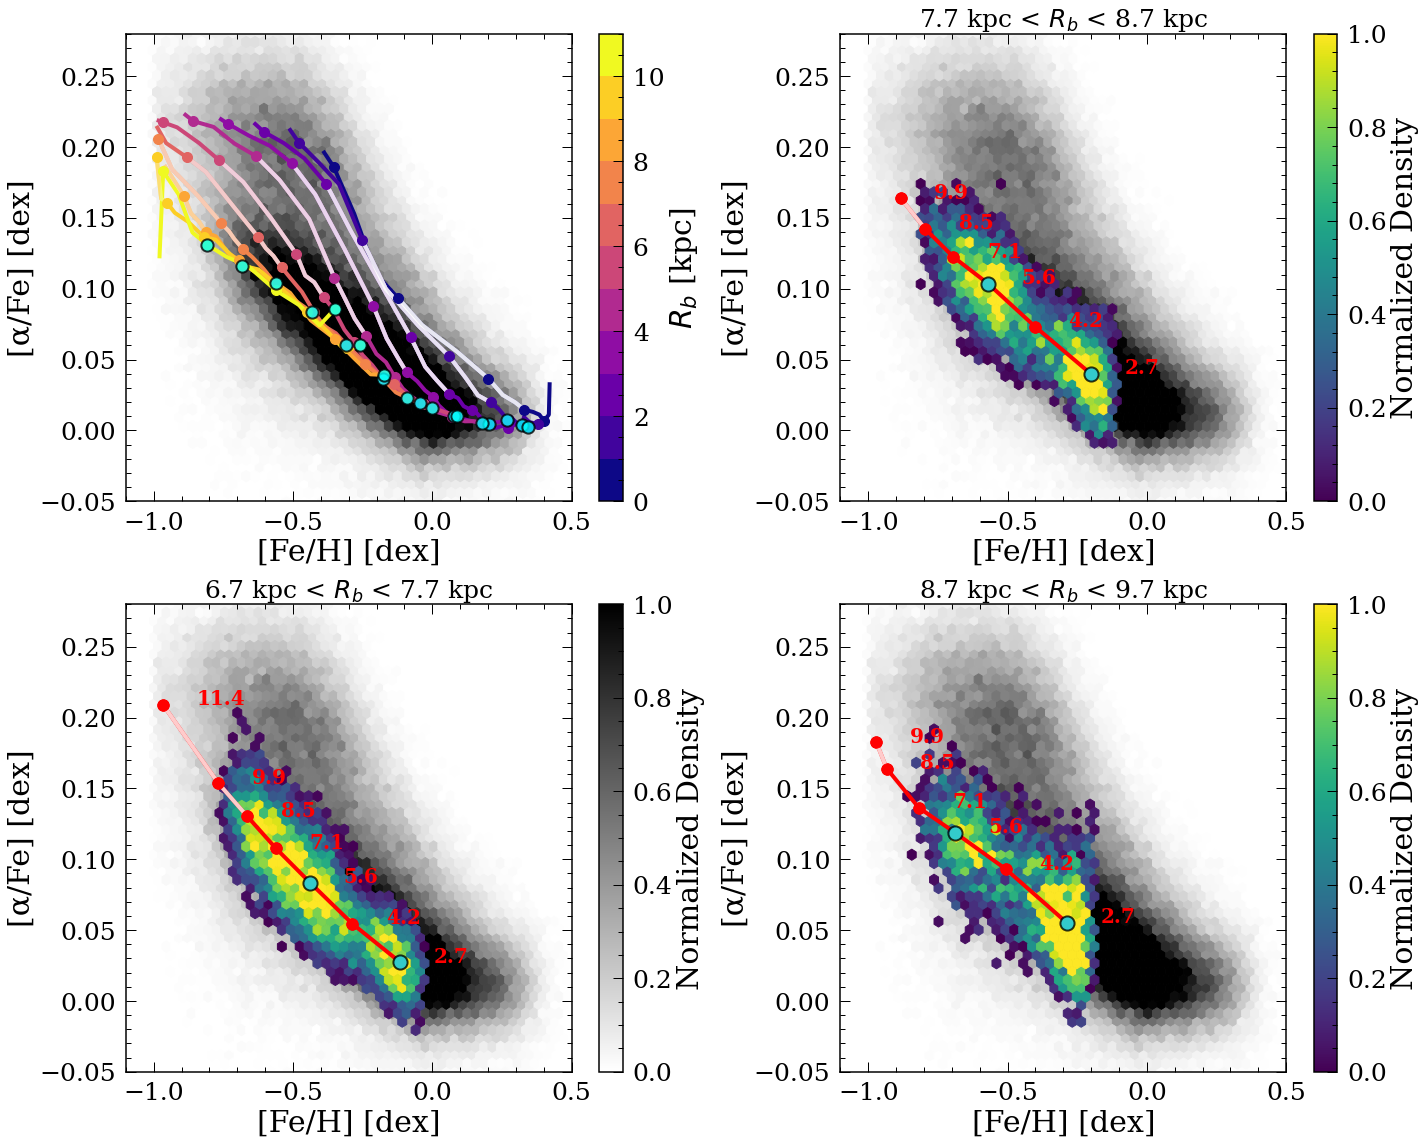

In [50]:
cutbin = 50
Nocut = 20
import warnings
warnings.filterwarnings('ignore')
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.03, 
              length_includes_head = True,
              color=colors)
    
agebin = np.linspace(2,15,10)
Rbbin = np.linspace(0.5,12.5,13)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-8.2)<0.5].reset_index(drop=True)

plt.figure(figsize=(20,16))
plt.subplot(2,2,2)
plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=Nocut,
               vmax=70)
cb = plt.colorbar()
cb.set_ticks(np.linspace(hb.get_array().min(),70, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')
meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('7.7 kpc < $R_b$ < 8.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
n = agebin[:-1]/2+agebin[1:]/2        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])





sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-9.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,4)
plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=10,
               vmax=40)

cb = plt.colorbar()
cb.set_ticks(np.linspace(hb.get_array().min(), 40, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('8.7 kpc < $R_b$ < 9.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())

plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])





sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-7.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,3)
hb = plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
cb = plt.colorbar()
cb.set_ticks(np.linspace(hb.get_array().min(), 300, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=20,
          vmax=90)

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('6.7 kpc < $R_b$ < 7.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)
        
for k in range(len(agebin)-1):


    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])






plt.subplot(2,2,1)
agebin = np.linspace(2,15,28)
Rbbin = np.linspace(0,11,12)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb

plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)

meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))


for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<10:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
    
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=4,
            zorder=8, markersize=10)  
    
    plt.plot(meanfeh[::3,j], meanafe[::3,j], 'o', color=colors[j], linewidth=4,
                    zorder=10, markersize=10)
    
    m3 = (((agebin[:-1]/2+agebin[1:]/2)>8)&((agebin[:-1]/2+agebin[1:]/2)<11))
    plt.plot(meanfeh[m3], meanafe[m3],color='w',zorder=9,
                    alpha=0.2,linewidth=4)

    
    agebin_p = agebin[::3]
    feh_p = meanfeh[::3,j]
    afe_p = meanafe[::3,j]
    
    for k in range(len(agebin_p)-1):
        """if ((agebin_p[k]/2+agebin_p[k+1]/2)>8) & ((agebin_p[k]/2+agebin_p[k+1]/2)<11):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='w',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)"""

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>5) & ((agebin_p[k]/2+agebin_p[k+1]/2)<6):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>2) & ((agebin_p[k]/2+agebin_p[k+1]/2)<3):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)



plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])
plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1],zorder=1)

plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')

plt.tight_layout()


plt.savefig('Figures/eps/afe_evol_4bin',bbox_inches='tight')
plt.savefig('Figures/afe_evol_4bin.png',bbox_inches='tight')




In [51]:
"""elements = readfits('DDPayne_LAMOST-DR5_recommend.fits')
list(elements.columns)

elements = pd.DataFrame(np.array((elements['SPECID'], elements['MG_FE'],
                                  elements['SNR_I'],elements['O_FE_FLAG'],
                                 elements['MG_FE_FLAG'])).T, 
                       columns=['SPECID','MG_FE','SNR_I','O_FE_FLAG','MG_FE_FLAG'])
elements['SPECID'] = [i.strip() for i in elements['SPECID']]
m = (elements['MG_FE_FLAG']==1)&(elements['SNR_I']>70)&(elements['O_FE_FLAG']==1)
elements_sel = elements[m]
print(sum(m))
sub_tryRb_ele = pd.read_csv('LAMOSTRbir.csv')
sub_tryRb_ele['SPECID'] = [i.split("'")[1].strip() for i in sub_tryRb_ele['SPECID']]
sub_tryRb_ele = pd.merge(sub_tryRb_ele, elements_sel[['SPECID','MG_FE']],
                     left_on='SPECID',right_on='SPECID',how='inner')

sub_tryRb_ele = sub_tryRb_ele.reset_index(drop=True)
"""

'elements = readfits(\'DDPayne_LAMOST-DR5_recommend.fits\')\nlist(elements.columns)\n\nelements = pd.DataFrame(np.array((elements[\'SPECID\'], elements[\'MG_FE\'],\n                                  elements[\'SNR_I\'],elements[\'O_FE_FLAG\'],\n                                 elements[\'MG_FE_FLAG\'])).T, \n                       columns=[\'SPECID\',\'MG_FE\',\'SNR_I\',\'O_FE_FLAG\',\'MG_FE_FLAG\'])\nelements[\'SPECID\'] = [i.strip() for i in elements[\'SPECID\']]\nm = (elements[\'MG_FE_FLAG\']==1)&(elements[\'SNR_I\']>70)&(elements[\'O_FE_FLAG\']==1)\nelements_sel = elements[m]\nprint(sum(m))\nsub_tryRb_ele = pd.read_csv(\'LAMOSTRbir.csv\')\nsub_tryRb_ele[\'SPECID\'] = [i.split("\'")[1].strip() for i in sub_tryRb_ele[\'SPECID\']]\nsub_tryRb_ele = pd.merge(sub_tryRb_ele, elements_sel[[\'SPECID\',\'MG_FE\']],\n                     left_on=\'SPECID\',right_on=\'SPECID\',how=\'inner\')\n\nsub_tryRb_ele = sub_tryRb_ele.reset_index(drop=True)\n'

In [52]:
"""cutbin = 1
maxstar = 10
import warnings
warnings.filterwarnings('ignore')
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.03, 
              length_includes_head = True,
              color=colors)
    
agebin = np.linspace(2,15,10)
Rbbin = np.linspace(0.5,12.5,13)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb_ele.loc[abs(sub_tryRb_ele['Rb']-8.2)<0.5].reset_index(drop=True)

plt.figure(figsize=(16,20))
plt.subplot(2,2,2)
plt.hexbin(sub_tryRb_ele['FEH'], sub_tryRb_ele['MG_FE'], 
              extent=(-1,0.5,-0.1,0.5), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['MG_FE'], 
          extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=cutbin,
               vmax=maxstar)
cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(),maxstar, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')
meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('7.7 kpc < $R_b$ < 8.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['MG_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
n = agebin[:-1]/2+agebin[1:]/2        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        elif txt<4:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]-0.02), 
             fontsize=20,color='r', weight='bold')
        elif txt<5:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]+0.01), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]+0.02), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[Mg/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.1,0.5])





sub_tryRb_sn = sub_tryRb_ele.loc[abs(sub_tryRb_ele['Rb']-7.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,4)
plt.hexbin(sub_tryRb_ele['FEH'], sub_tryRb_ele['MG_FE'], 
              extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['MG_FE'], 
          extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=cutbin,
               vmax=maxstar)

cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(), maxstar, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('6.7 kpc < $R_b$ < 7.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['MG_FE'].values[m]).dropna())

plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[Mg/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.1,0.5])





sub_tryRb_sn = sub_tryRb_ele.loc[abs(sub_tryRb_ele['Rb']-6.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,3)
hb = plt.hexbin(sub_tryRb_ele['FEH'], sub_tryRb_ele['MG_FE'], 
              extent=(-1,0.5,-0.1,0.5), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(), 300, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['MG_FE'], 
          extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=cutbin,
          vmax=maxstar)

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('5.7 kpc < $R_b$ < 6.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['MG_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)
        
for k in range(len(agebin)-1):


    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[Mg/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.1,0.5])






plt.subplot(2,2,1)
agebin = np.linspace(2,15,28)
Rbbin = np.linspace(0,11,12)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb_ele

plt.hexbin(sub_tryRb_ele['FEH'], sub_tryRb_ele['MG_FE'], 
              extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)

meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))


for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<10:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['MG_FE'].values[m]).dropna())
    
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=4,
            zorder=8, markersize=10)  
    
    plt.plot(meanfeh[::3,j], meanafe[::3,j], 'o', color=colors[j], linewidth=4,
                    zorder=10, markersize=10)
    
    m3 = (((agebin[:-1]/2+agebin[1:]/2)>8)&((agebin[:-1]/2+agebin[1:]/2)<11))
    plt.plot(meanfeh[m3], meanafe[m3],color='w',zorder=9,
                    alpha=0.2,linewidth=4)

    
    agebin_p = agebin[::3]
    feh_p = meanfeh[::3,j]
    afe_p = meanafe[::3,j]
    
    for k in range(len(agebin_p)-1):

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>5) & ((agebin_p[k]/2+agebin_p[k+1]/2)<6):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>2) & ((agebin_p[k]/2+agebin_p[k+1]/2)<3):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)

plt.xlim([-1.1,0.5])
plt.ylim([-0.1,0.5])
plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1],zorder=1)

plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[Mg/Fe] [dex]')
cb = plt.colorbar(location='bottom')
cb.set_label('$R_b$ [kpc]')

plt.tight_layout()


plt.savefig('Figures/eps/mgfe_evol_4bin',bbox_inches='tight')
plt.savefig('Figures/mgfe_evol_4bin.png',bbox_inches='tight')





"""

"cutbin = 1\nmaxstar = 10\nimport warnings\nwarnings.filterwarnings('ignore')\ndef drawArrow(A, B, colors):\n    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],\n              head_width=0.01, head_length=0.03, \n              length_includes_head = True,\n              color=colors)\n    \nagebin = np.linspace(2,15,10)\nRbbin = np.linspace(0.5,12.5,13)\n\ncolors = getcolor(range(len(Rbbin)-1))\n\nsub_tryRb_sn = sub_tryRb_ele.loc[abs(sub_tryRb_ele['Rb']-8.2)<0.5].reset_index(drop=True)\n\nplt.figure(figsize=(16,20))\nplt.subplot(2,2,2)\nplt.hexbin(sub_tryRb_ele['FEH'], sub_tryRb_ele['MG_FE'], \n              extent=(-1,0.5,-0.1,0.5), gridsize=50, mincnt=1,\n              cmap='binary',vmax=300)\n    \nhb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['MG_FE'], \n          extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=cutbin,\n               vmax=maxstar)\ncb = plt.colorbar(location='bottom')\ncb.set_ticks(np.linspace(hb.get_array().min(),maxstar, 6))\ncb.set_ticklabels(['%.1f'%i for 

In [53]:
"""cutbin = 10
import warnings
warnings.filterwarnings('ignore')
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.03, 
              length_includes_head = True,
              color=colors)
    
agebin = np.linspace(2,15,10)
Rbbin = np.linspace(0.5,12.5,13)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb_ele.loc[abs(sub_tryRb_ele['Rb']-2.2)<0.5].reset_index(drop=True)

plt.figure(figsize=(16,20))
plt.subplot(2,2,2)
plt.hexbin(sub_tryRb_ele['FEH'], sub_tryRb_ele['MG_FE'], 
              extent=(-1,0.5,-0.1,0.5), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['MG_FE'], 
          extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=20,
               vmax=120)
cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(),120, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')
meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('2.7 kpc < $R_b$ < 3.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['MG_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
n = agebin[:-1]/2+agebin[1:]/2        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        elif txt<4:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]-0.02), 
             fontsize=20,color='r', weight='bold')
        elif txt<5:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]+0.01), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]+0.02), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[Mg/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.1,0.5])





sub_tryRb_sn = sub_tryRb_ele.loc[abs(sub_tryRb_ele['Rb']-4.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,4)
plt.hexbin(sub_tryRb_ele['FEH'], sub_tryRb_ele['MG_FE'], 
              extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['MG_FE'], 
          extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=20,
               vmax=120)

cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(), 120, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('4.7 kpc < $R_b$ < 5.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['MG_FE'].values[m]).dropna())

plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[Mg/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.1,0.5])





sub_tryRb_sn = sub_tryRb_ele.loc[abs(sub_tryRb_ele['Rb']-3.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,3)
hb = plt.hexbin(sub_tryRb_ele['FEH'], sub_tryRb_ele['MG_FE'], 
              extent=(-1,0.5,-0.1,0.5), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(), 300, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['MG_FE'], 
          extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=20,
          vmax=150)

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('3.7 kpc < $R_b$ < 4.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['MG_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)
        
for k in range(len(agebin)-1):


    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[Mg/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.1,0.5])






plt.subplot(2,2,1)
agebin = np.linspace(2,15,28)
Rbbin = np.linspace(0,11,12)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb_ele

plt.hexbin(sub_tryRb_ele['FEH'], sub_tryRb_ele['MG_FE'], 
              extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)

meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))


for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<10:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['MG_FE'].values[m]).dropna())
    
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=4,
            zorder=8, markersize=10)  
    
    plt.plot(meanfeh[::3,j], meanafe[::3,j], 'o', color=colors[j], linewidth=4,
                    zorder=10, markersize=10)
    
    m3 = (((agebin[:-1]/2+agebin[1:]/2)>8)&((agebin[:-1]/2+agebin[1:]/2)<11))
    plt.plot(meanfeh[m3], meanafe[m3],color='w',zorder=9,
                    alpha=0.2,linewidth=4)

    
    agebin_p = agebin[::3]
    feh_p = meanfeh[::3,j]
    afe_p = meanafe[::3,j]
    
    for k in range(len(agebin_p)-1):

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>5) & ((agebin_p[k]/2+agebin_p[k+1]/2)<6):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>2) & ((agebin_p[k]/2+agebin_p[k+1]/2)<3):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)

plt.xlim([-1.1,0.5])
plt.ylim([-0.1,0.5])
plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1],zorder=1)

plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[Mg/Fe] [dex]')
cb = plt.colorbar(location='bottom')
cb.set_label('$R_b$ [kpc]')

plt.tight_layout()


plt.savefig('Figures/eps/mgfe_evol_4bin',bbox_inches='tight')
plt.savefig('Figures/mgfe_evol_4bin.png',bbox_inches='tight')




"""

"cutbin = 10\nimport warnings\nwarnings.filterwarnings('ignore')\ndef drawArrow(A, B, colors):\n    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],\n              head_width=0.01, head_length=0.03, \n              length_includes_head = True,\n              color=colors)\n    \nagebin = np.linspace(2,15,10)\nRbbin = np.linspace(0.5,12.5,13)\n\ncolors = getcolor(range(len(Rbbin)-1))\n\nsub_tryRb_sn = sub_tryRb_ele.loc[abs(sub_tryRb_ele['Rb']-2.2)<0.5].reset_index(drop=True)\n\nplt.figure(figsize=(16,20))\nplt.subplot(2,2,2)\nplt.hexbin(sub_tryRb_ele['FEH'], sub_tryRb_ele['MG_FE'], \n              extent=(-1,0.5,-0.1,0.5), gridsize=50, mincnt=1,\n              cmap='binary',vmax=300)\n    \nhb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['MG_FE'], \n          extent=(-1.1,0.5,-0.1,0.5), gridsize=50, mincnt=20,\n               vmax=120)\ncb = plt.colorbar(location='bottom')\ncb.set_ticks(np.linspace(hb.get_array().min(),120, 6))\ncb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


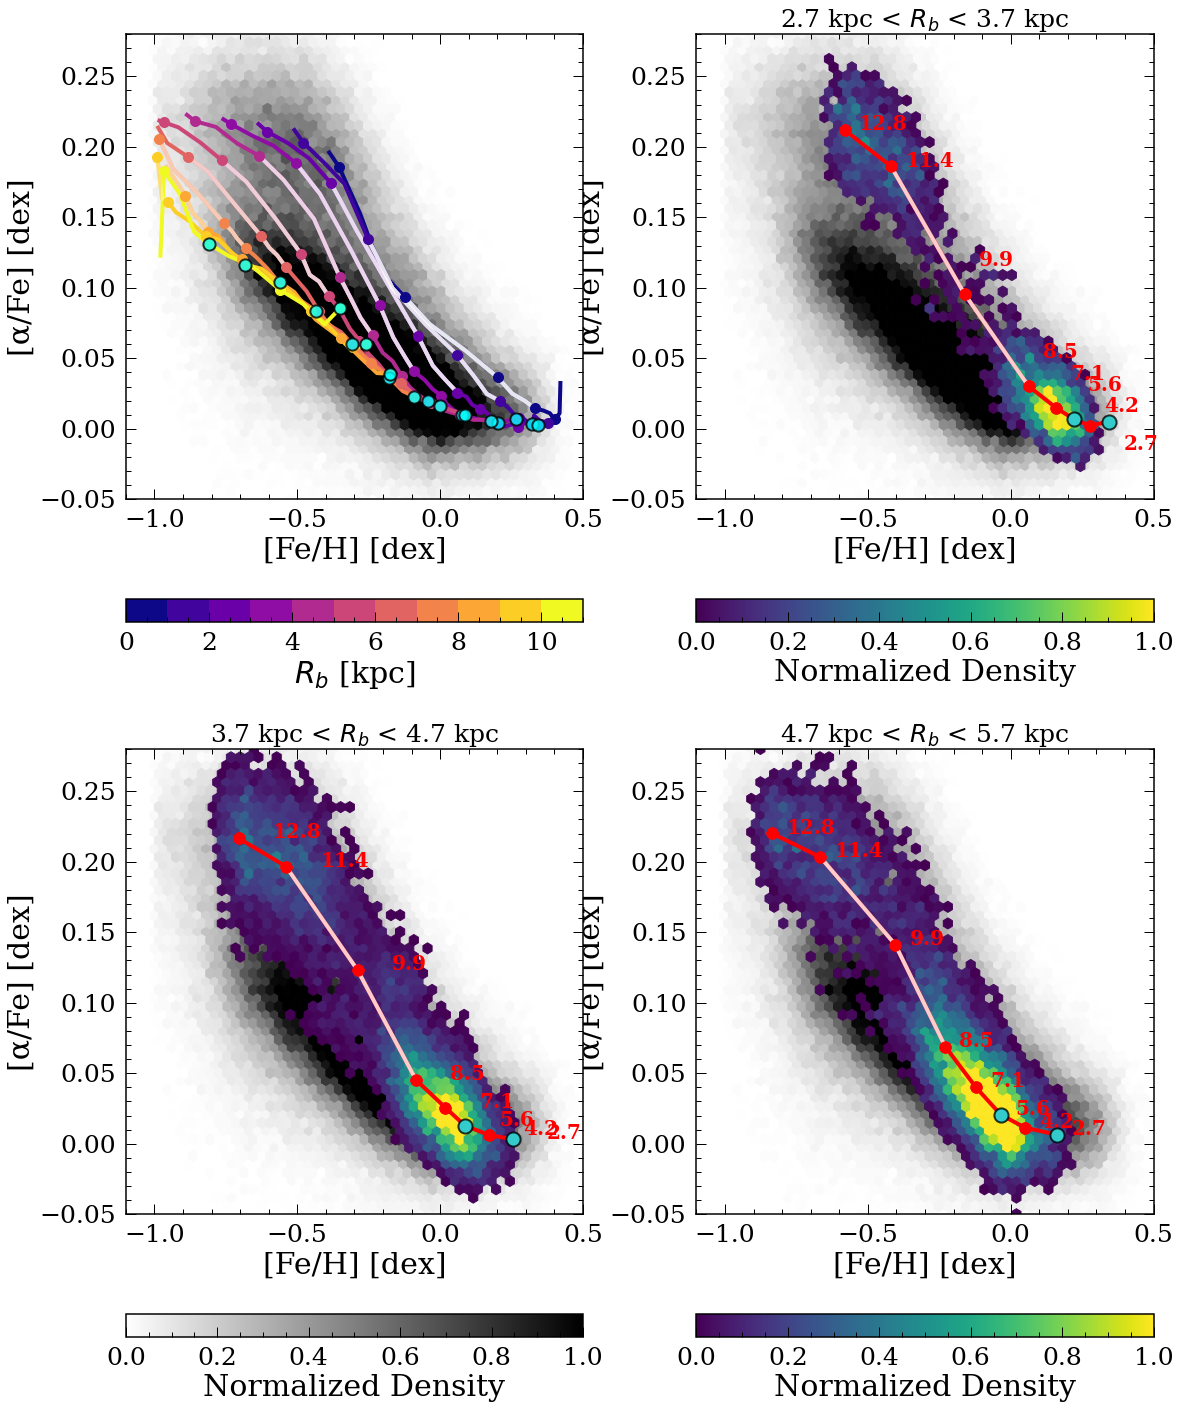

In [54]:
cutbin = 50
import warnings
warnings.filterwarnings('ignore')
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.03, 
              length_includes_head = True,
              color=colors)
    
agebin = np.linspace(2,15,10)
Rbbin = np.linspace(0.5,12.5,13)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-2.2)<0.5].reset_index(drop=True)

plt.figure(figsize=(16,20))
plt.subplot(2,2,2)
plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=20,
               vmax=120)
cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(),120, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')
meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('2.7 kpc < $R_b$ < 3.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
n = agebin[:-1]/2+agebin[1:]/2        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        elif txt<4:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]-0.02), 
             fontsize=20,color='r', weight='bold')
        elif txt<5:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]+0.01), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]+0.02), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])





sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-4.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,4)
plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=10,
               vmax=120)

cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(), 120, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('4.7 kpc < $R_b$ < 5.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())

plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])





sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-3.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,3)
hb = plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(), 300, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=10,
          vmax=150)

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('3.7 kpc < $R_b$ < 4.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)
        
for k in range(len(agebin)-1):


    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])






plt.subplot(2,2,1)
agebin = np.linspace(2,15,28)
Rbbin = np.linspace(0,11,12)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb

plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)

meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))


for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<10:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
    
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=4,
            zorder=8, markersize=10)  
    
    plt.plot(meanfeh[::3,j], meanafe[::3,j], 'o', color=colors[j], linewidth=4,
                    zorder=10, markersize=10)
    
    m3 = (((agebin[:-1]/2+agebin[1:]/2)>8)&((agebin[:-1]/2+agebin[1:]/2)<11))
    plt.plot(meanfeh[m3], meanafe[m3],color='w',zorder=9,
                    alpha=0.2,linewidth=4)

    
    agebin_p = agebin[::3]
    feh_p = meanfeh[::3,j]
    afe_p = meanafe[::3,j]
    
    for k in range(len(agebin_p)-1):

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>5) & ((agebin_p[k]/2+agebin_p[k+1]/2)<6):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>2) & ((agebin_p[k]/2+agebin_p[k+1]/2)<3):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)



plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])
plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1],zorder=1)

plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
cb = plt.colorbar(location='bottom')
cb.set_label('$R_b$ [kpc]')

plt.tight_layout()


plt.savefig('Figures/eps/afe_evol_4bin',bbox_inches='tight')
plt.savefig('Figures/afe_evol_4bin.png',bbox_inches='tight')





In [55]:
np.diff(Rbbin)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

[ 0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75
  6.25  6.75  7.25  7.75  8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75
 12.25]
[ 1.75  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75  6.25  6.75  7.25
  7.75  8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75 12.25 12.75 13.25
 13.75 14.25 14.75]


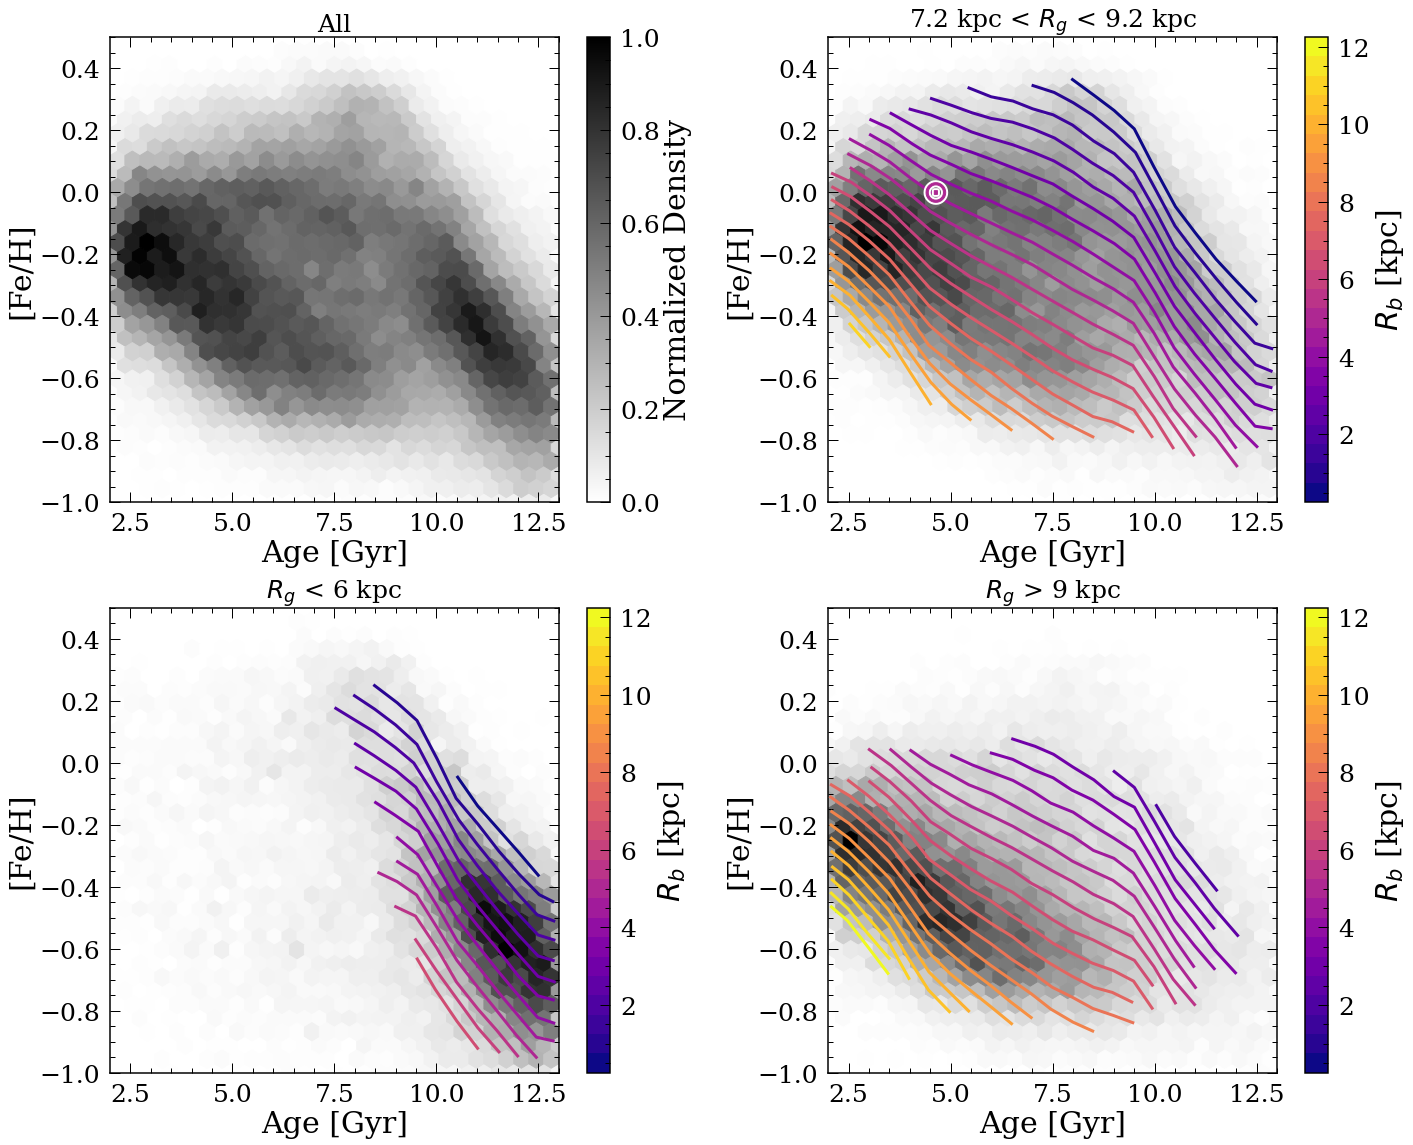

In [56]:
cutbin = 60
import warnings
warnings.filterwarnings('ignore')
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.03, 
              length_includes_head = True,
              color=colors)
    
agebin = np.linspace(2,15,27)-0.25
Rbbin = np.linspace(0.5,12.5,25)-0.25
print(Rbbin)
print(agebin)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-8.2)<1].reset_index(drop=True)



plt.figure(figsize=(20,16))
plt.subplot(2,2,2)
plt.hexbin(sub_tryRb_sn['AGE'], sub_tryRb_sn['FEH'], 
          extent=(2,13,-1,0.5), gridsize=30, mincnt=1,
          cmap='binary')
#yedges, xedges, H = coldensity(sub_tryRb_sn['AGE'], 
#                               sub_tryRb_sn['FEH'],binsize=30,
#          extend=(2,13,-1,0.5))

#plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=1)



meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<cutbin:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['AGE'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=3,
            zorder=10)

    """plt.scatter(meanfeh[:,j], meanafe[:,j], c = colors[j], 
                s=80, edgecolor='w',
                cmap=plt.get_cmap('plasma', len(Rbbin)-1),
               vmin=Rbbin[0], vmax=Rbbin[-1],zorder=9)"""
    
#for i in range(len(agebin)-1):
#    plt.plot(meanfeh[i,:], meanafe[i,:], '--', color='w',zorder=4)



plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1])
plt.scatter(4.6, 0, marker='$\\odot$', c='w', s=500, linewidth=5,
           zorder=99)
plt.scatter(4.6, 0, c=5, marker='$\\odot$', vmin=Rbbin[0], vmax=Rbbin[-1],
           cmap=plt.get_cmap('plasma',len(Rbbin)-1), s=500,zorder=100)

plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.xlim([2,13])
plt.ylim([-1,0.5])
plt.title('7.2 kpc < $R_g$ < 9.2 kpc', fontsize=25)
#plt.title('7.7 kpc < Rb_corrected < 8.7 kpc', fontsize=25)





sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING'])>9].reset_index(drop=True)

plt.subplot(2,2,4)
plt.hexbin(sub_tryRb_sn['AGE'], sub_tryRb_sn['FEH'], 
          extent=(2,13,-1,0.5), gridsize=30, mincnt=1,
          cmap='binary')
#yedges, xedges, H = coldensity(sub_tryRb_sn['AGE'], 
#                               sub_tryRb_sn['FEH'],binsize=30,
#          extend=(2,13,-1,0.5))

#plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=1)
meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<cutbin:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['AGE'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=3,
            zorder=10)

    """plt.scatter(meanfeh[:,j], meanafe[:,j], c = colors[j], 
                s=80, edgecolor='w',
                cmap=plt.get_cmap('plasma', len(Rbbin)-1),
               vmin=Rbbin[0], vmax=Rbbin[-1],zorder=9)"""
    
#for i in range(len(agebin)-1):
#    plt.plot(meanfeh[i,:], meanafe[i,:], '--', color='w',zorder=4)




plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1])

plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.xlim([2,13])
plt.ylim([-1,0.5])
plt.title('$R_g$ > 9 kpc', fontsize=25)






sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING'])<6].reset_index(drop=True)

plt.subplot(2,2,3)
plt.hexbin(sub_tryRb_sn['AGE'], sub_tryRb_sn['FEH'], 
          extent=(2,13,-1,0.5), gridsize=30, mincnt=1,
          cmap='binary')
#yedges, xedges, H = coldensity(sub_tryRb_sn['AGE'], 
#                               sub_tryRb_sn['FEH'],binsize=30,
#          extend=(2,13,-1,0.5))

#plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=1)
meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<cutbin:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['AGE'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=3,
            zorder=10)
    
    """plt.scatter(meanfeh[:,j], meanafe[:,j], c = colors[j], 
                s=80, edgecolor='w',
                cmap=plt.get_cmap('plasma', len(Rbbin)-1),
               vmin=Rbbin[0], vmax=Rbbin[-1],zorder=9)"""
    
#for i in range(len(agebin)-1):
#    plt.plot(meanfeh[i,:], meanafe[i,:], '--', color='w',zorder=4)




plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1],zorder=1)

plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.xlim([2,13])
plt.ylim([-1,0.5])
plt.title('$R_g$ < 6 kpc', fontsize=25)







#Rbbin = np.linspace(0,15,16)

plt.subplot(2,2,1)
"""plt.hexbin(sub_tryRb['AGE'], sub_tryRb['FEH'], 
           C=sub_tryRb['Rb'],vmin=0,vmax=12,
          extent=(0,13,-1,0.5), gridsize=50, mincnt=10,
          cmap=plt.get_cmap('plasma',10))"""

hb = plt.hexbin(sub_tryRb['AGE'], sub_tryRb['FEH'], 
          extent=(2,13,-1,0.5), gridsize=30, mincnt=1,
          cmap='binary')
#yedges, xedges, H = coldensity(sub_tryRb_sn['AGE'], 
#                               sub_tryRb_sn['FEH'],binsize=30,
#          extend=(2,13,-1,0.5))

#plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=1)
meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb['AGE']>agebin[i])&(sub_tryRb['AGE']<agebin[i+1])
        m = m&(sub_tryRb['Rb']>Rbbin[j])
        m = m&(sub_tryRb['Rb']<Rbbin[j+1])
        if sum(m)<cutbin:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb['AGE'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb['FEH'].values[m]).dropna())
    #plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=2,
    #        zorder=10)
    #plt.plot(meanfeh[:,j], meanafe[:,j], '-', color='w', linewidth=4,
    #        zorder=9)
    """plt.scatter(meanfeh[:,j], meanafe[:,j], c = colors[j], 
                s=80, edgecolor='w',
                cmap=plt.get_cmap('plasma', len(Rbbin)-1),
               vmin=Rbbin[0], vmax=Rbbin[-1],zorder=9)"""

plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
cb = plt.colorbar()
cb.set_ticks(np.linspace(hb.get_array().min(), hb.get_array().max(), 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')
plt.xlim([2,13])
plt.ylim([-1,0.5])
plt.title('All', fontsize=25)

plt.tight_layout()


plt.savefig('Figures/eps/feage_evol_4bin',bbox_inches='tight')
plt.savefig('Figures/feage_evol_4bin.png',bbox_inches='tight')



100%|██████████| 39/39 [00:00<00:00, 132.53it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


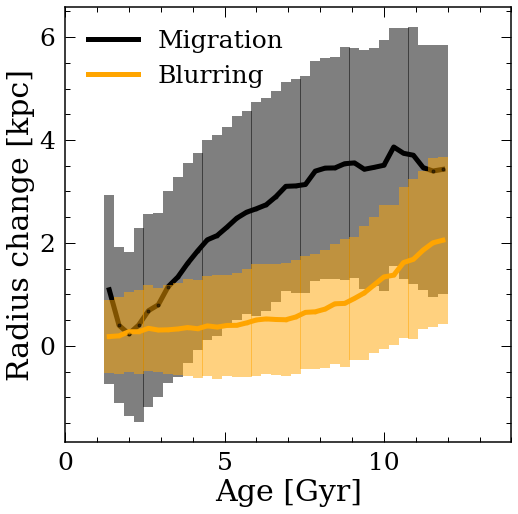

In [57]:
import astropy.uncertainty as unc

agebincalc_rm = np.linspace(0,12,40)
sub_tryRb['AGE_sca'] = sub_tryRb['AGE']
sub_tryRb_sub = sub_tryRb
sub_tryRb_sub = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING'])<20]
sub_tryRb_sub = sub_tryRb_sub.loc[sub_tryRb_sub['Rb']<20]
sub_tryRb_sub = sub_tryRb_sub.loc[sub_tryRb_sub['FEH']>-1]
sub_tryRb_sub = sub_tryRb_sub.loc[abs(sub_tryRb_sub['R']-8.2)<0.5]

mean_dr = np.zeros(len(agebincalc_rm)-1)
std_dr = np.zeros(len(agebincalc_rm)-1)

mean_blr = np.zeros(len(agebincalc_rm)-1)
std_blr = np.zeros(len(agebincalc_rm)-1)

for i in trange(len(agebincalc_rm)-1):
    sub_tryRb_sing = sub_tryRb_sub.loc[(sub_tryRb_sub['AGE']>agebincalc_rm[i])&(sub_tryRb_sub['AGE']<agebincalc_rm[i+1])]

    sub_tryRb_sing = sub_tryRb_sing.dropna(subset=['Rb','R_GUIDING'])
    
    if len(sub_tryRb_sing)<30:
        mean_dr[i] = np.nan
        std_dr[i] = np.nan
        
        mean_blr[i] = np.nan
        std_blr[i] = np.nan
        continue
    
    mean_dr[i] = np.mean(sub_tryRb_sing['R_GUIDING']-sub_tryRb_sing['Rb'])
    std_dr[i] = np.std(sub_tryRb_sing['R_GUIDING']-sub_tryRb_sing['Rb'])
    mean_blr[i] = np.mean(sub_tryRb_sing['R']-sub_tryRb_sing['R_GUIDING'])
    std_blr[i] = np.std(sub_tryRb_sing['R']-sub_tryRb_sing['R_GUIDING'])

        
plt.figure(figsize=(8,8))

plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,
             yerr=std_dr, fmt='.',  color='k', alpha=0.5,
            linewidth=10)
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,'-',
         color='k', linewidth=5, label='Migration')

plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,
             yerr=std_blr, fmt='.',  color='orange', alpha=0.5,
            linewidth=10)
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,'-',
         color='orange', linewidth=5, label='Blurring')

plt.xlim([0,14])
#plt.ylim([0,10])
plt.xlabel('Age [Gyr]')
plt.ylabel('Radius change [kpc]')
plt.legend(loc=2)

plt.savefig('Figures/eps/migrationStr',bbox_inches='tight')
plt.savefig('Figures/migrationStr.png',bbox_inches='tight')